In [28]:
import sklearn
from sklearn.svm import LinearSVC
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [29]:
data = pd.read_csv('cs-unplugged.csv')
data.shape
data = data[0:360]
gender = {'M': 1, 'F': 2}
data.Gender = [gender[item] for item in data.Gender]
result_before = {'P': 1, 'F': 0}
result_after = {'P': 1, 'F': 0}
data.Results_Before = [result_before[item] for item in data.Results_Before]
data.Results_After = [result_after[item] for item in data.Results_After]


In [30]:
#data =data[['Age','Gender','Class','Results_Before', 'Results_After']]
data =data[['Age','Gender','Class','Results_Before', 'Results_After','Change']]
data.head()

,Age,Gender,Class,Results_Before,Results_After,Change
0,12,1,4,0,0,F
1,10,2,4,0,0,F
2,10,1,4,0,0,F
3,12,1,4,0,0,F
4,8,1,4,1,1,T


In [31]:
array = data.values
#X = array[:,0:4]
#Y = array[:,4:]
X = array[:,0:5]
Y = array[:,5:]

In [16]:
from sklearn import svm
clf = LinearSVC(loss='hinge', C= 10, max_iter = 1000)
#clf=svm.SVC(kernel='linear',probability=True)

In [17]:
from sklearn.model_selection import train_test_split  
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = seed) 
clf.fit(X,Y)
#probas_=clf.fit(X_train, Y_train).predict_proba(X_test)

c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [26]:
 # performing 5-Fold Cross Validation
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5)

for id_train, id_test in k_fold.split(X_train):
    svc = svm.SVC(kernel='linear', C=10)  # choose a valid C and gamma
    score = svc.fit(X_train[id_train], Y_train[id_train]).score(X_train[id_test], Y_train[id_test])
print('Best accuracy=' + str(score))

Best accuracy=1.0


c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\areesha tariq\appdata\local\programs\python\python35-32\lib\site-packages\sk

In [21]:
score = clf.score(X_test,Y_test)

In [22]:
print(score)

1.0


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import classification_report, confusion_matrix  
predictions = clf.predict(X_test)
print(accuracy_score(Y_test, predictions))

1.0


In [24]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           F       1.00      1.00      1.00        19
           T       1.00      1.00      1.00        53

   micro avg       1.00      1.00      1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



[-0.03687533 -0.06052222  0.02138089 -0.01468295  2.16166081]


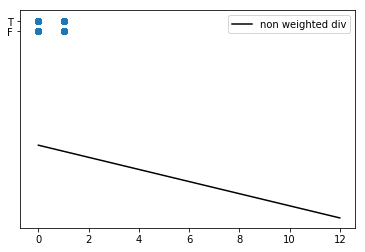

In [25]:
w= clf.coef_[0]
print(w)
a=-w[0] / w[1]
xx=np.linspace(0,12)
yy=a*xx-clf.intercept_[0] / w[1]
h0= plt.plot(xx,yy, 'k-',label="non weighted div")
plt.scatter(X[:,3],Y[:,0])
plt.legend()
plt.show()
